In [1]:
#импорт основных библиотек

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#импорт датасета

from google.colab import files 
uploaded = files.upload()

Saving listings_prepar.csv to listings_prepar.csv


In [5]:
#начальный вид датасета

df = pd.read_csv('listings_prepar.csv')
df

,number_of_reviews,calculated_host_listings_count,availability_365,datetime_diff,room_type=0,room_type=1,room_type=2,room_type=3,price
0,65.0,1.0,53.0,831.0,0.0,0.0,1.0,0.0,70.0
1,33.0,2.0,48.0,1247.0,0.0,0.0,1.0,0.0,17.0
2,64.0,1.0,301.0,890.0,1.0,0.0,0.0,0.0,115.0
3,8.0,1.0,0.0,1658.0,0.0,0.0,1.0,0.0,54.0
4,38.0,3.0,337.0,890.0,1.0,0.0,0.0,0.0,90.0
...,...,...,...,...,...,...,...,...,...
3839,19.0,2.0,144.0,889.0,0.0,0.0,1.0,0.0,169.0
3840,40.0,8.0,317.0,922.0,0.0,0.0,0.0,1.0,149.0
3841,14.0,1.0,267.0,879.0,1.0,0.0,0.0,0.0,80.0
3842,73.0,2.0,51.0,822.0,1.0,0.0,0.0,0.0,180.0


In [9]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, :-1]
y = df['price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


In [10]:
#меняем формат массивов на датасеты

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test)
y_train = pd.DataFrame(y_train)
y_train = np.asarray(y_train).reshape(-1,1)
y_test = np.asarray(y_test).reshape(-1,1)

In [11]:
# Шкалируем данные 
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler().fit(y_train)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

In [12]:
#устанавливаем нужные библиотеки для НС

#!pip install tensorflow
#!pip install keras
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense


In [24]:

# Initialising the ANN
rnn = Sequential()

# Adding the input layer and the first hidden layer
rnn.add(Dense(12, activation = 'tanh', input_dim = 8))

# Adding the second hidden layer
rnn.add(Dense(7, activation = 'tanh'))


# Adding the output layer
rnn.add(Dense(1, activation = 'linear'))

# Compiling the ANN
rnn.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

In [25]:
# Fitting the ANN to the Training set
k = rnn.fit(X_train, y_train, batch_size = 8, validation_data=(X_test, y_test), epochs = 100)

Epoch 1/100
385/385 [==============================] - 1s 2ms/step - loss: 1.0515 - accuracy: 0.0000e+00 - val_loss: 0.9720 - val_accuracy: 0.0000e+00
Epoch 2/100
385/385 [==============================] - 1s 2ms/step - loss: 0.9793 - accuracy: 0.0000e+00 - val_loss: 0.9715 - val_accuracy: 0.0000e+00
Epoch 3/100
385/385 [==============================] - 1s 2ms/step - loss: 0.9720 - accuracy: 0.0000e+00 - val_loss: 0.9600 - val_accuracy: 0.0000e+00
Epoch 4/100
385/385 [==============================] - 1s 2ms/step - loss: 0.9658 - accuracy: 0.0000e+00 - val_loss: 0.9569 - val_accuracy: 0.0000e+00
Epoch 5/100
385/385 [==============================] - 1s 2ms/step - loss: 0.9618 - accuracy: 0.0000e+00 - val_loss: 0.9502 - val_accuracy: 0.0000e+00
Epoch 6/100
385/385 [==============================] - 1s 2ms/step - loss: 0.9581 - accuracy: 0.0000e+00 - val_loss: 0.9515 - val_accuracy: 0.0000e+00
Epoch 7/100
385/385 [==============================] - 1s 2ms/step - loss: 0.9552 - accuracy: 

In [26]:
# Predicting the Test set results
y_pred = rnn.predict(X_test)

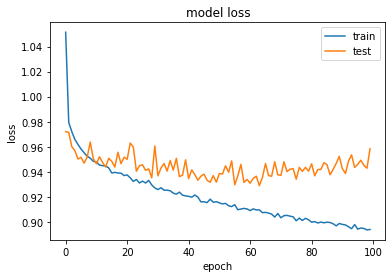

In [27]:
# Plotting loss & accuracy
plt.figure()
plt.plot(k.history['loss'])
plt.plot(k.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [28]:
#Стоит отметить, что на примерно 40-80 эпохах у нас практически нет никакого разрыва! Попробуем построить, возьмем 80 эпох.

In [29]:
# Inversing scaling
from sklearn.preprocessing import StandardScaler
y_hat = sc_y.inverse_transform(y_pred)
y_test = sc_y.inverse_transform(y_test)
X_test = sc_X.inverse_transform(X_test)

In [30]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(sc_y.inverse_transform(y_train), sc_y.inverse_transform(rnn.predict(X_train)), squared=False).round(3), mean_squared_error(y_test, y_hat, squared=False).round(3)

(35.165, 36.493)

In [31]:
#testing the best features

df = df.drop(columns = ['datetime_diff'], );
df = df.drop(columns = ['calculated_host_listings_count'], );
df = df.drop(columns = ['availability_365'], );
df = df.drop(columns = ['room_type=0'], );
df = df.drop(columns = ['room_type=1'], );
df = df.drop(columns = ['room_type=2'], );
df = df.drop(columns = ['room_type=3'], );
df
								

,number_of_reviews,price
0,65.0,70.0
1,33.0,17.0
2,64.0,115.0
3,8.0,54.0
4,38.0,90.0
...,...,...
3839,19.0,169.0
3840,40.0,149.0
3841,14.0,80.0
3842,73.0,180.0


In [35]:
# Initialising the ANN
rnn = Sequential()

# Adding the input layer and the first hidden layer
rnn.add(Dense(12, activation = 'tanh', input_dim = 8))

# Adding the second hidden layer
rnn.add(Dense(7, activation = 'tanh'))


# Adding the output layer
rnn.add(Dense(1, activation = 'linear'))

# Compiling the ANN
rnn.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

In [36]:
# Fitting the ANN to the Training set
k = rnn.fit(X_train, y_train, batch_size = 10, validation_data=(X_test, y_test), epochs = 80)

Epoch 1/80
308/308 [==============================] - 1s 3ms/step - loss: 1.0432 - accuracy: 0.0000e+00 - val_loss: 5288.5801 - val_accuracy: 0.0000e+00
Epoch 2/80
308/308 [==============================] - 1s 2ms/step - loss: 0.9834 - accuracy: 0.0000e+00 - val_loss: 5285.3101 - val_accuracy: 0.0000e+00
Epoch 3/80
308/308 [==============================] - 1s 2ms/step - loss: 0.9723 - accuracy: 0.0000e+00 - val_loss: 5292.4087 - val_accuracy: 0.0000e+00
Epoch 4/80
308/308 [==============================] - 1s 2ms/step - loss: 0.9661 - accuracy: 0.0000e+00 - val_loss: 5282.3853 - val_accuracy: 0.0000e+00
Epoch 5/80
308/308 [==============================] - 1s 2ms/step - loss: 0.9630 - accuracy: 0.0000e+00 - val_loss: 5285.2686 - val_accuracy: 0.0000e+00
Epoch 6/80
308/308 [==============================] - 1s 2ms/step - loss: 0.9599 - accuracy: 0.0000e+00 - val_loss: 5295.8936 - val_accuracy: 0.0000e+00
Epoch 7/80
308/308 [==============================] - 1s 2ms/step - loss: 0.9571 -

In [37]:
# Predicting the Test set results
y_pred = rnn.predict(X_test)

In [38]:
# Inversing scaling
from sklearn.preprocessing import StandardScaler
y_hat = sc_y.inverse_transform(y_pred)
y_test = sc_y.inverse_transform(y_test)
X_test = sc_X.inverse_transform(X_test)

In [39]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(sc_y.inverse_transform(y_train), sc_y.inverse_transform(rnn.predict(X_train)), squared=False).round(3), mean_squared_error(y_test, y_hat, squared=False).round(3)

(35.18, 2689.509)

In [ ]:
# В целом стоит заметить, что НС лучше справляются с прогнозированием, особенно даже по одному критерию - количеству отзывов у апартаментов
# Однако есть предположение, что на новых и свежих данных с учетом специфики вероятность высокой эффективности модели невысока